<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    AlexNet Image Classification
</div>



* It is a CNN architecture that is used for image classification. It is based on the AlexNet architecture. The AlexNet architecture is a convolutional neural network (CNN) that was designed to perform image classification tasks. It was introduced in 2012 by Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. 

* The AlexNet architecture consists of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers are used to extract features from the input image, while the pooling layers are used to reduce the spatial dimensions of the features. The fully connected layers are used to make the final classification predictions. 

* The AlexNet architecture has been used for a wide range of image classification tasks, including object recognition, image segmentation, and image generation. It has also been used in various computer vision applications, such as object detection and image retrieval. 

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import  plot_model

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [23]:
labels = [
    "airplane", "automobile", "bird", "cat",
    "deer", "dog", "frog", "horse", "ship", "truck"
]

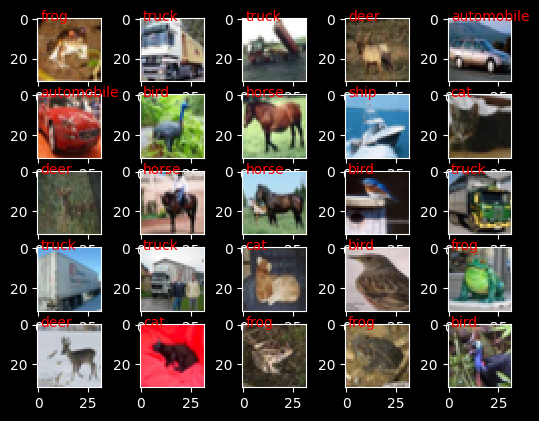

In [24]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.text(1, 1, labels[y_train[i][0]], fontsize=10, color='red')
plt.show()  

In [25]:
model = Sequential()
model.add(Input(shape=(32,32,3)))

model.add(Conv2D(filters=128, kernel_size=(5, 5),strides=(1, 1), activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3),strides=(1, 1), activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=256, kernel_size=(3, 3),strides=(1, 1), activation='relu', ))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(1, 1),strides=(1, 1), activation='relu', ))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(1, 1),strides=(1, 1), activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))



In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,824,266 (6.96 MB)

 Trainable params: 1,821,962 (6.95 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [27]:
plot_model(
    model=model,
    show_dtype=True,
    show_layer_names=True,
    show_shapes=True
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    X_train, y_train,
    batch_size=10,
    epochs=10,
)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 166s 32ms/step - accuracy: 0.2861 - loss: 2.0108
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 162s 32ms/step - accuracy: 0.4504 - loss: 1.5597
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.5293 - loss: 1.3642
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.5788 - loss: 1.2300
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.6129 - loss: 1.1248
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.6554 - loss: 1.0377
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.6804 - loss: 0.9574
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 32ms/step - accuracy: 0.6950 - loss: 0.9084
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.7151 - loss: 0.8585
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 163s 33ms/step - accuracy: 0.7196 - loss: 0.8186


In [36]:
val_histroy = model.evaluate(X_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.7155 - loss: 0.8884


In [39]:
val_histroy

[0.8820123076438904, 0.7139000296592712]

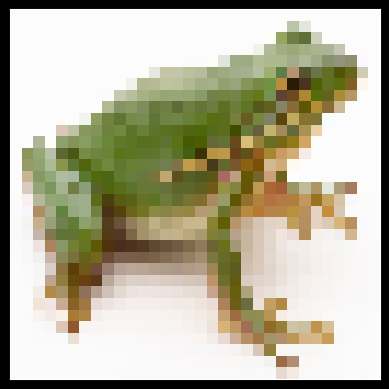

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


'frog'

In [37]:
import cv2

img = cv2.imread('content/images/frog.jpg')
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
resized_image = cv2.resize(img, (32, 32))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()

prediction = model.predict(resized_image.reshape(1, 32, 32, 3))
labels[np.argmax(prediction)]

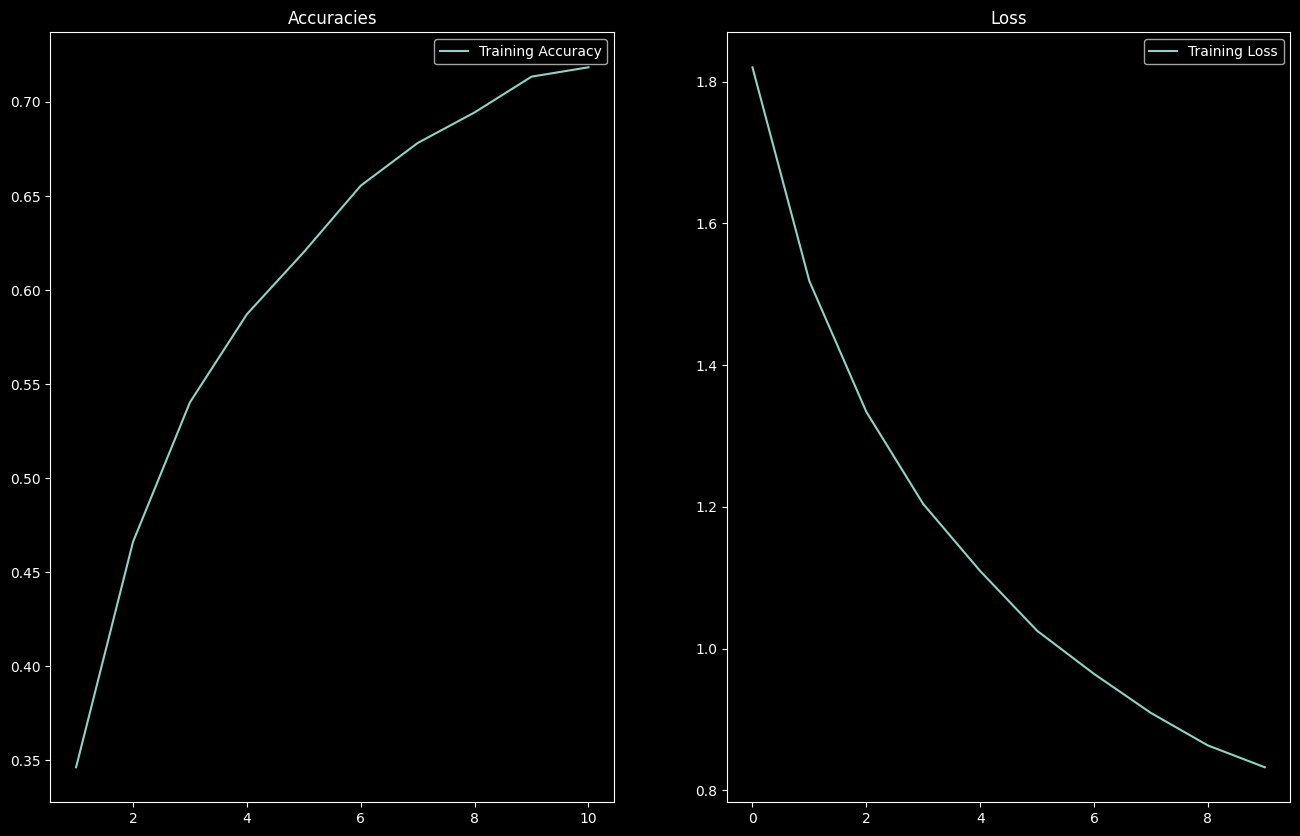

In [42]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
plt.title('Accuracies')
plt.plot(range(1,11),history.history['accuracy'], label='Training Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()

plt.show()

In [48]:
import os 
import requests

def preedict_image(url):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200 and 'image' in response.headers['Content-Type']:
            with open("download_image.jpg", "wb") as f:
                f.write(response.content)
        else:
            print("Invalid image URL or content type.")
            return

        img = cv2.imread("download_image.jpg")
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        resized_image = cv2.resize(img, (32, 32))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(resized_image)
        plt.show()

        prediction = model.predict(resized_image.reshape(1, 32, 32, 3))
        print(f'Prediction: {labels[np.argmax(prediction)]}') 
     
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if os.path.exists("download_image.jpg"):
            os.remove("download_image.jpg")


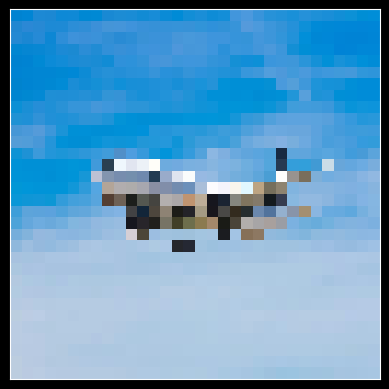

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: airplane


In [49]:
preedict_image(
    "https://images.unsplash.com/photo-1529074963764-98f45c47344b?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8YWVyb3BsYW5lfGVufDB8fDB8fHww"
)